# Introduction
This project looks at mean score differences between men and women on two outcome measures from employee exit survey responses.  The two outcome measures are:
- How likely are you to recommend the Company as a place to work?  
- If given the opportunity in the future, how likely are you to consider returning to the Company?

When analyzing data from previous employee engagement surveys, differences between gender have been found for 'values-type' items.  That is, items that seem to tap into individual values (e.g., Protect the Environment, Fast Track Career Growth Opportunity) where women tend to rate the former as being more important when choosing to work for a company compared to men who tend to rate the latter as being more important.

Meaningful differences between men in women in recommending their past company as a place to work to others or considering returning to work for a company again could provide insight to how companies design their messaging around recruitment and marketing efforts.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

In [7]:
mydata = pd.read_csv("ttest_exit.csv")

In [8]:
mydata.head()

,recommendCompany,returnToCompany,supvExpectations,supvFeedback,supvRecognition,supvCared,emplGender
0,2,4,4,4,4,4,Female
1,2,4,4,4,4,4,Male
2,3,4,4,4,4,4,Female
3,3,4,4,4,4,4,Female
4,3,4,4,4,4,4,Male


# Methodology
The goal of the analysis is to compare differences between men and women, two independent sample t tests will be performed, one for each outcome variable.

### Summary Statistics

In [87]:
# Can't figure out how to limit output to just the two output variables.  Will update when I figure it out.
mydata.groupby('emplGender').describe()


recommendCompany                                               \
                      count      mean       std  min  25%  50%  75%  max   
emplGender                                                                 
Female                460.0  3.193478  1.499296  1.0  2.0  3.0  5.0  5.0   
Male                  365.0  3.054795  1.464698  1.0  2.0  3.0  4.0  5.0   

           returnToCompany           ...  supvFeedback      supvRecognition  \
                     count      mean ...           75%  max           count   
emplGender                           ...                                      
Female               460.0  3.152174 ...           5.0  5.0           460.0   
Male                 365.0  3.021918 ...           5.0  5.0           365.0   

                                                         
                mean       std  min  25%  50%  75%  max  
emplGender                                               
Female      3.478261  1.391526  1.0  3.0  4.0  5.0  5.0  
Male        3.498630  1.345780  1.0  3.0  4.0  5.0  5.0  

[2 rows x 48 columns]

In [85]:
mydata.groupby('emplGender').mean()

,recommendCompany,returnToCompany,supvExpectations,supvFeedback,supvRecognition,supvCared
emplGender,,,,,,
Female,3.193478,3.152174,3.523913,3.443478,3.478261,3.428261
Male,3.054795,3.021918,3.534247,3.427397,3.498630,3.457534


### Data Visualization

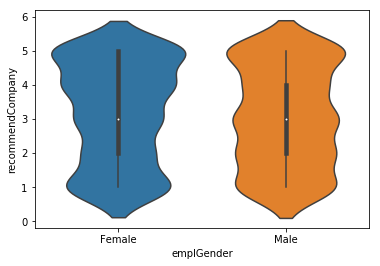

In [59]:
sns.violinplot( x=mydata["emplGender"], y=mydata["recommendCompany"] )

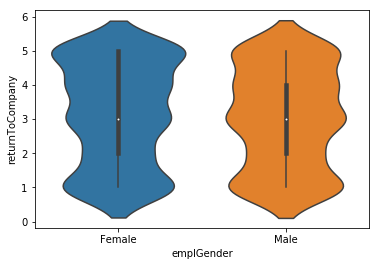

In [56]:
sns.violinplot( x=mydata["emplGender"], y=mydata["returnToCompany"] )

### Statistical Tests

In [18]:
cat1 = mydata[mydata['emplGender']=='Female']
cat2 = mydata[mydata['emplGender']=='Male']

In [19]:
ttest_ind(cat1['recommendCompany'], cat2['recommendCompany'])

Ttest_indResult(statistic=1.3330999791400457, pvalue=0.182867891312372)

In [20]:
ttest_ind(cat1['returnToCompany'], cat2['returnToCompany'])

Ttest_indResult(statistic=1.2553873339537758, pvalue=0.2096945039626873)

# Results
Data were analyzied on survey responses from 460 women and 365 men (n = 825).  On average, women score higher on both outcome measures.  However, t test results show that the mean differences are not statistically significant.  One point of interest is the mean differences between men and women are much smaller among the four supervisor behavior items (Expectations, Feedback, Recognition, and Caring) than they are between the two outcome measures (Recommend, Return).  Lastly, looking at the standard deviations and violin plots, women tend to use more of the 5-Point Likert scale on both outcome items than men do.

# Discussion
Although the t test results are not significant, the data is clearly directional.  That is, women rated the two outcome variables higher than men did.  This would be less interesting if women tended to rate all the survey items higher, but they did not.  The mean differences between the supervisory behaviors where much closer between men and women.  This suggests that women may tend to regard companies they worked for in the past with more of an ***'open heart'*** compared to men.

